In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from scipy.interpolate import interp1d
from utils_CR import CR

# Flexible Image Transport System (FITS) is a digital file format useful for storage, transmission and processing of data: formatted as N-dimensional arrays (for example a 2D image) or tables.  


*FITS is the most commonly used digital file format in astronomy. The FITS standard has special (optional) features for scientific data, for example it includes many provisions for describing photometric and spatial calibration information, together with image origin metadata.*

***

In [2]:
out_folder = './'
FILE = out_folder + 'BaseModel_DRAGONxsec_spectrum.fits.gz'
print(FILE)
hdulist = fits.open(FILE)
hdulist.info()
len(hdulist), type(hdulist)

./BaseModel_DRAGONxsec_spectrum.fits.gz
Filename: ./BaseModel_DRAGONxsec_spectrum.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (74,)   float32   
  1                1 ImageHDU        13   (74,)   float32   
  2                1 ImageHDU        13   (74,)   float32   
  3                1 ImageHDU        13   (74,)   float32   
  4                1 ImageHDU        13   (74,)   float32   
  5                1 ImageHDU        13   (74,)   float32   
  6                1 ImageHDU        13   (74,)   float32   
  7                1 ImageHDU        13   (74,)   float32   
  8                1 ImageHDU        13   (74,)   float32   
  9                1 ImageHDU        13   (74,)   float32   
 10                1 ImageHDU        13   (74,)   float32   
 11                1 ImageHDU        13   (74,)   float32   
 12                1 ImageHDU        13   (74,)   float32   
 13                1 ImageHDU        13   (74,)   float

(34, astropy.io.fits.hdu.hdulist.HDUList)

In [3]:
#PRIMARY HEADER OF THE OUTPUT
hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    1 / number of data axes                            
NAXIS1  =                   74 / length of data axis 1                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
RMIN    =                   0.                                                  
RMAX    =                  12.                                                  
ZMIN    =                  -4.                                                  
ZMAX    =                   4.                                                  
ROBS    =                  8.3                                                  
ZOBS    =                   

In [4]:
#HEADER OF THE DATA
hdulist[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    1 / number of data axes                            
NAXIS1  =                   74 / length of data axis 1                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
Z_      =                   -1                                                  
A       =                    0                                                  
SEC     =                    0                                                  
DM      =                    0                                                  
EXTRA   =                    0                                                  
TPP     =                    0                                                  
S_AB    =                   

# DATA EXTRACTION

In [5]:
#hdulist.info() 
prihdr = hdulist[0].header  # the primary header 
n_ext  = len(hdulist)


table_hdu    = hdulist[0]              
table_header = table_hdu.header     # header attribute of TABLE 
print(table_header['zmin'], table_header['zmax'], table_header['rmin'], table_header['rmax'], table_header['izsun'], 
      table_header['irsun'], table_header['dimz'], table_header['dimr'], table_header['robs'], table_header['zobs'])

'''
zmin   = table_header['zmin']
zmax   = table_header['zmax']
rmin   = table_header['rmin']
rmax   = table_header['rmax']
izsun  = table_header['izsun']
irsun  = table_header['irsun']
dimz   = table_header['dimz']
dimr   = table_header['dimr']
robs   = table_header['robs']
zobs   = table_header['zobs']
'''
emin   = table_header['ekmin']
ek_fac = table_header['ekin_fac']
dimE   = table_header['dimE'] 

E = [emin*(ek_fac**i) for i in range(0,dimE)]
E = np.array(E)

table_H1_P, table_H1_S, table_H2, table_H3, table_He4, table_He3, table_C12, table_C13, table_C14, table_N14, table_N15, table_O16, table_O17, table_O18, table_Ne, table_Mg, table_Si = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
table_B10, table_B11 = [], []
for i in range(1,n_ext): #points in the list         

    ## Main primary CRs
    if hdulist[i].header['A'] == 12 and hdulist[i].header['Z_'] == 6 :
        table_C12.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 13 and hdulist[i].header['Z_'] == 6 :
        table_C13.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 14 and hdulist[i].header['Z_'] == 6 :
        table_C14.append(hdulist[i].data)
        
    # H and He
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 0 :
        table_H1_P.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 1 :
        table_H1_S.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 2 and hdulist[i].header['Z_'] == 1 :
        table_H2.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 1 :
        table_H3.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 4 and hdulist[i].header['Z_'] == 2 :
        table_He4.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 2 :
        table_He3.append(hdulist[i].data)
        
    ## LiBeB group
    elif hdulist[i].header['A'] == 10 and hdulist[i].header['Z_'] == 5 :
        table_B10.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 11 and hdulist[i].header['Z_'] == 5 :
        table_B11.append(hdulist[i].data)
        

table_H1 = np.array(table_H1_P + table_H1_S)

-4.0 4.0 0.0 12.0 40 41 81 61 8.3 0.0


In [6]:
#params for the plots
widths = [1]
heights = [2.8,1.]
gs_kw = dict(width_ratios=widths, height_ratios=heights)


data_folder = 'datasets/'

# H

In [7]:
data = data_folder + 'prot_AMS_2011-2013.dat'
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxp = (fluxp_low + fluxp_up)/2

data = data_folder + 'p_flux_ATIC2009.txt'
EmeanAT, EmeanAT_low, EmeanAT_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxAT, fluxAT_low, fluxAT_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxAT = (fluxAT_low + fluxAT_up)/2

data = data_folder + 'p_flux_CREAMIII_ApJ2017.txt'
EmeanCR, EmeanCR_low, EmeanCR_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxCR, fluxCR_low, fluxCR_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxCR = (fluxCR_low + fluxCR_up)/2

data = data_folder + 'DAMPE_protons.txt'
EmeanDA, EmeanDA_low, EmeanDA_up = np.loadtxt(data,skiprows=1,usecols=(1, 0, 2), unpack=True)
fluxDA, fluxDA_low, fluxDA_up = np.loadtxt(data,skiprows=1,usecols=(4, 3, 5), unpack=True)
errfluxDA = (fluxDA_low + fluxDA_up)/2

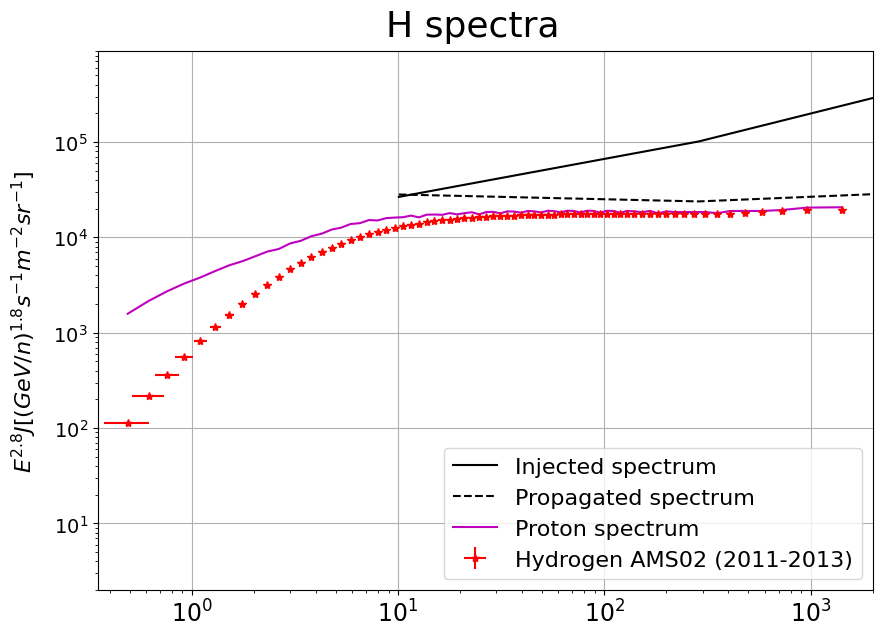

In [9]:
slope = 2.8

inj_spec = 5e3*E**-2
inj_spec[E>7] = inj_spec[E<7][-1] * (E[E>7]/(E[E<7][-1]))**-2.4
inj_spec[E>335] = inj_spec[E<335][-1] * (E[E>335]/(E[E<335][-1]))**-2.26

prop_spec = inj_spec*E**-0.45 *3


fig1, frame1 = plt.subplots(figsize=(10,7))
fig1.suptitle("H spectra", fontsize = 26, y=0.94)
    
frame1.set_yscale('log')
frame1.set_xscale('log')

frame1.plot(E[E>10],inj_spec[E>10]*E[E>10]**slope,'k',label = 'Injected spectrum')
frame1.plot(E[E>10],prop_spec[E>10]*E[E>10]**slope,'k--',label = 'Propagated spectrum')

frame1.errorbar(Emeanp, fluxp*np.power(Emeanp, slope), xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low*np.power(Emeanp, slope), fluxp_up*np.power(Emeanp, slope)], fmt= '*r', label = "Hydrogen AMS02 (2011-2013)") #Real data

H1 = np.interp(Emeanp, E, np.array(table_H1)[0])
H2 = np.interp(Emeanp, E, np.array(table_H2)[0])
H3 = np.interp(Emeanp, E,  np.array(table_H3)[0])

mod0 = H1 + H2 + H3

frame1.plot(Emeanp, mod0*(Emeanp**slope), "m-", label='Proton spectrum')


frame1.set_ylabel(r"$E^{2.8} J [(GeV/n)^{1.8} s^{-1} m^{-2} sr^{-1}]$", fontsize = 16, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=16)
frame1.grid()
frame1.set_ylim(bottom = 2, top = 9e5)
frame1.set_xlim(left = 0.35, right = 2000)
frame1.legend(fontsize =16, loc = 4)

plt.xticks(fontsize=17)
plt.yticks(fontsize=14)

plt.show()
plt.close()

## Solar modulation

  $\textbf{Force Field approximation:}$
\begin{equation}
\Phi_{obs} (E_{obs})=  \left( \frac{2 m E_{obs} + E_{obs}^2}{2 m E_{ISM} + E_{ISM}^2}\right) \Phi_{ISM}(E_{ISM}) ,
\label{eq:potmod} 
\end{equation}
with $E_{ISM} = E_{obs} + e \phi |Z|/A$.


In [10]:
phi_ams = 0.6  ## Fisk potential adopted to make the plots 

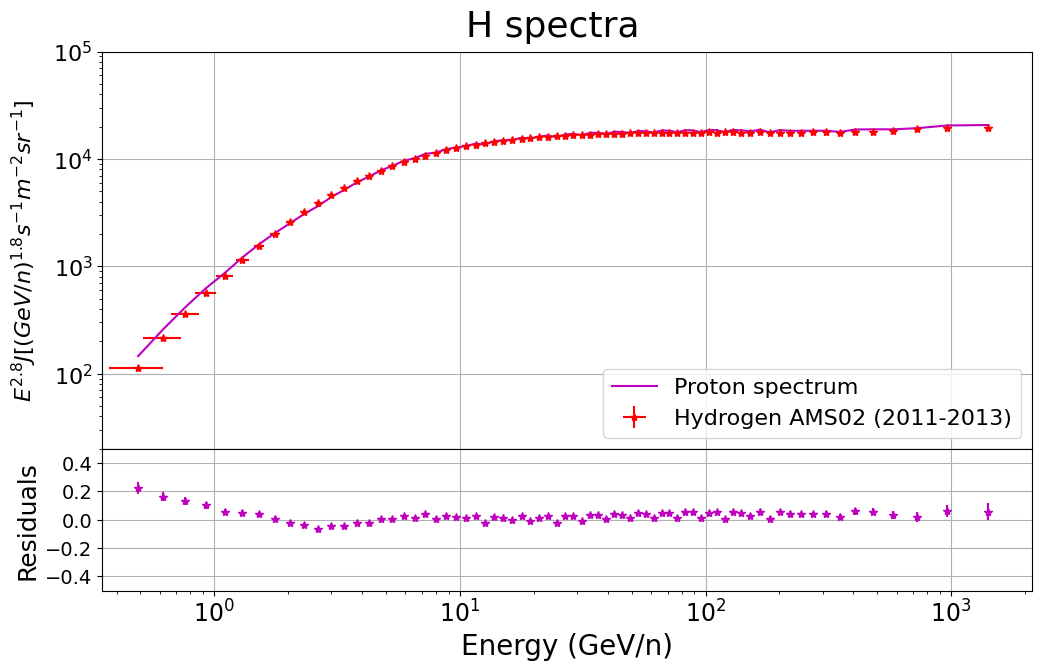

In [11]:
slope = 2.8

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("H spectra", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log')

frame1.errorbar(Emeanp, fluxp*np.power(Emeanp, slope), xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low*np.power(Emeanp, slope), fluxp_up*np.power(Emeanp, slope)], fmt= '*r', label = "Hydrogen AMS02 (2011-2013)") #Real data


H1 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams))
H2 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams))
H3 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams))

mod0 = H1 + H2 + H3

frame1.plot(Emeanp, mod0*(Emeanp**slope), "m-", label='Proton spectrum')


frame1.set_ylabel(r"$E^{2.8} J [(GeV/n)^{1.8} s^{-1} m^{-2} sr^{-1}]$", fontsize = 16, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=16)
frame1.grid()
frame1.set_ylim(bottom = 2e1, top = 1e5)
frame1.set_xlim(left = 0.35)#, right = 2000)
frame1.legend(fontsize =16, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxp)
frame2.errorbar(Emeanp, diff/mod0, yerr = [(fluxp_up/fluxp), (fluxp_low/fluxp)],  fmt= "m*")


frame2.set_ylabel("Residuals", fontsize = 18)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 20)
frame2.set_xlim(left = 0.35)#, right = 1800)
frame2.grid()
plt.xticks(fontsize=17)
plt.yticks(fontsize=14)
frame2.set_ylim(bottom = -0.5, top = 0.5)
#frame2.legend(ncol = 4, loc = 0) #1 is upper right
plt.show()
plt.close()

In [12]:
## For Voyager data
def voyerr(a, b, da, db):
    if ((type(a) != np.ndarray) or (type(b) != np.ndarray) or 
        (type(da) != np.ndarray) or (type(db) != np.ndarray)):
        print("Error, the Fluxes (Energies) and errFluxes (ErrEnergies) must be an array")
    return np.sqrt((da/b)**2 + (-a*db/b**2)**2)

data = data_folder +  'Voyager1_2012_Proton.dat'
EmeanVp, EmeanVp_low, EmeanVp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxVp, fluxVp_low, fluxVp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxVp = (fluxVp_low + fluxVp_up)/2

/tmp/ipykernel_20641/2620593501.py:33: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  LH = leg.legendHandles


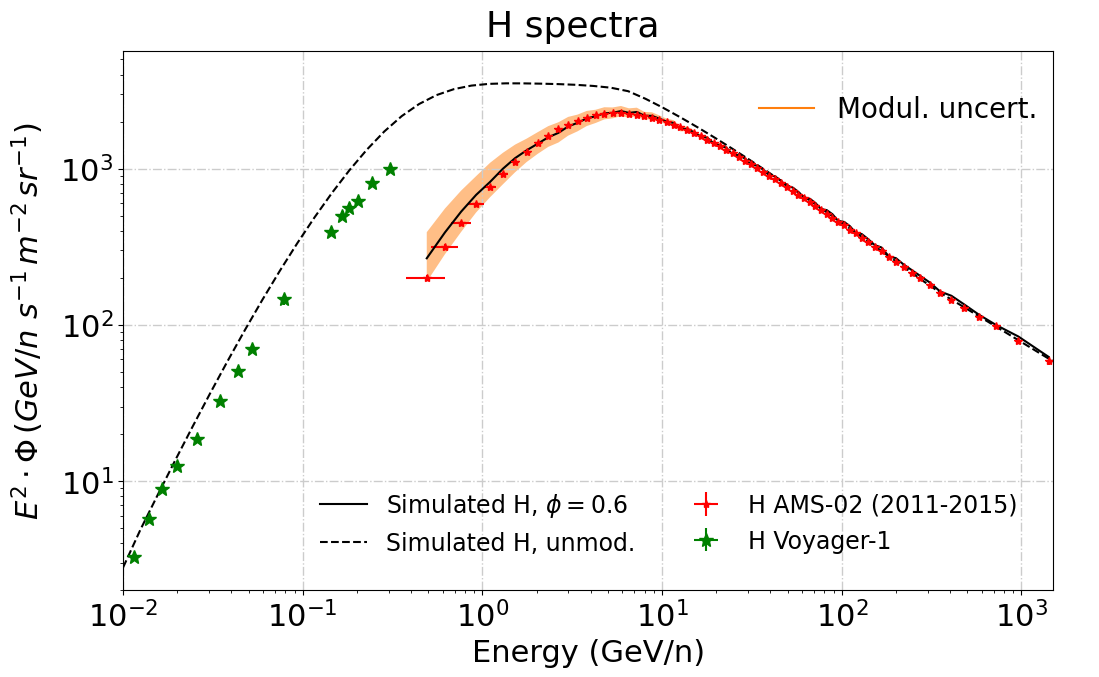

In [13]:
sloppe = 2.

fig1 = plt.figure(figsize=(12,7))
fig1.suptitle("H spectra", fontsize = 26, y=0.94)
plt.yscale('log')
plt.xscale('log')

plt.errorbar(Emeanp, fluxp*Emeanp**sloppe, yerr = [fluxp_low*Emeanp**2, fluxp_up*Emeanp**sloppe], xerr = [(Emeanp - Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], fmt='*r', label = r"H AMS-02 (2011-2015)") #Real data
plt.errorbar(EmeanVp, fluxVp*np.power(EmeanVp, sloppe), xerr = [(EmeanVp-EmeanVp_low)/EmeanVp, (EmeanVp_up-EmeanVp)/EmeanVp], yerr = [fluxVp_low*np.power(EmeanVp, sloppe), fluxVp_up*np.power(EmeanVp, sloppe)], fmt= '*g', label = r"H Voyager-1", markersize = 10.)

####### Protons #####
H1 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011))
H2 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011))
H3 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011))
mod1 = (H1 + H2 + H3)
plt.plot(Emeanp, mod1*(Emeanp**sloppe), "k-", label = r"Simulated H, $\phi = {}$".format(str(phi_ams)))

H1_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011+0.12))
H2_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011+0.12))
H3_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011+0.12))
mod1sup  = (H1_ + H2_ + H3_)*(Emeanp**sloppe)
H1_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011-0.12))
H2_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011-0.12))
H3_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011-0.12))
mod1low  = (H1_ + H2_ + H3_)*Emeanp**(sloppe)
plt.fill_between(Emeanp, mod1sup, mod1low, facecolor='C1', alpha=0.5)#, label = r"2 $\sigma$ modul.")

mod0 = (np.array(table_H1)[0] + np.array(table_H2)[0] + np.array(table_H3)[0])*(E**sloppe)
plt.semilogx(E, mod0, "k", linestyle='dashed', label = "Simulated H, unmod.")


leg = fig1.legend(labels=[ "Modul. uncert."], ncol = 1, fontsize = 20, frameon = False, loc = (0.68, 0.8)) 
LH = leg.legendHandles
LH[0].set_color('C1')
plt.legend(prop={'size': 17}, frameon = False, ncol = 2, loc = 'lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel(r"$E^{2} \cdot \Phi \, (GeV$/$n  \,\,s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
plt.xlabel("Energy (GeV/n)", fontsize = 22)
plt.xlim(right = 1.5e3, left = 0.01)
plt.ylim(bottom = 2e0)
plt.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.show()
plt.close()

## EXERCISE

Plot He3, He4 and total Helium (He3 + He4) and apply solar modulation

In [14]:
## DATA FILES

data = data_folder + 'He_AMS_2011-2013.dat'
EmeanHe, EmeanHe_low, EmeanHe_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxHe, fluxHe_low, fluxHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxHe = (fluxHe_low + fluxHe_up)/2

data = data_folder + 'Voyager_He_2012.dat'
EmeanVHe, EmeanVHe_left, EmeanVHe_right = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxVHe, fluxVHe_low, fluxVHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxVHe = (fluxVHe_low + fluxVHe_up)/2

# MAIN PRIMARIES

 The spectrum of primary cosmic rays is a convolution from their propagation and their injection.
 
 Injection formula that we use in this example is:
 
 \begin{equation}
Q = \begin{cases}
     K_1 \times\left(\frac{R}{R_0}\right)^{\gamma_1} & \text{for $R < R_{1}$} \\
     K_2 \times\left( \frac{R}{R_0}\right)^{\gamma_2} & \text{for $R_{1} < R < R_{2}$} \\
     K_3 \times\left( \frac{R}{R_0}\right)^{\gamma_3} & \text{for $R > R_{2}$}
  \end{cases} 
\end{equation}

where $Q$ is the injeted differential energy flux in units of m$^{-2}$ s$^{-1}$ sr$^{-1}$ GV$^{-1}$, $R_{1,2}$ are the rigidity breaks, $\gamma_{1,2,3}$ are the logarithmic slopes below and above each break and the parameters $K_{i}$ set the normalization of the injected flux. The low-energy break was set to $R_{1}=7$ GV for all nuclei, while the high-energy break was set to $R_{2}=335$ GV for protons and $R_{2}=200$ GV for the heavier nuclei. 

As an approximation (Leaky-box approx.), at high energies (above $\sim 10$ GeV) primary CRs show a flux that behaves like: $\Phi \propto E^{\gamma + \delta}$.

## CARBON

In [15]:
data = data_folder + 'C_AMS_PRL2017.txt'
EmeanC, EmeanC_low, EmeanC_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxC, fluxC_low, fluxC_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxC = (fluxC_low + fluxC_up)/2

myZ = 6
data = data_folder + 'apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA


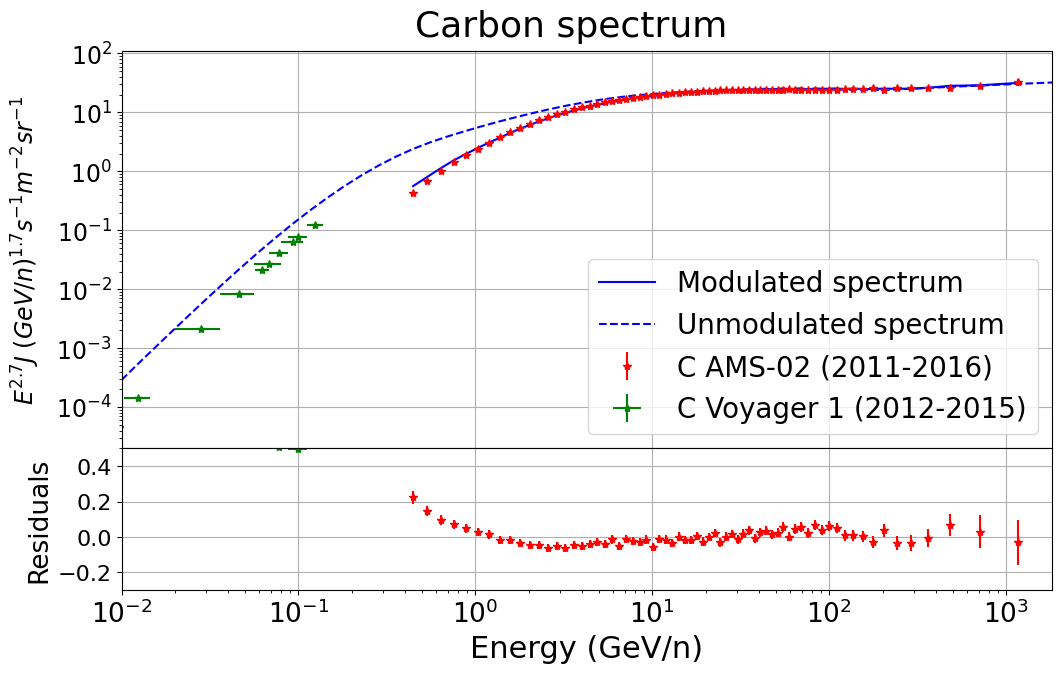

In [16]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Carbon spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log')

frame1.errorbar(EmeanC, fluxC*np.power(EmeanC, 2.7), yerr = [fluxC_low*np.power(EmeanC, 2.7), fluxC_up*np.power(EmeanC, 2.7)], fmt= '*r', label = "C AMS-02 (2011-2016)") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr = [Emean_min, Emean_max], yerr = errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "C Voyager 1 (2012-2015)") #Real data
C12 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C12)[0], myZ, 12, phi_ams))
C13 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C13)[0], myZ, 13, phi_ams))
C14 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C14)[0], myZ, 14, phi_ams))
#C12 = interp1d(E, CR.modul(E, np.array(table_C12)[0], myZ, 12, phi_ams), 'cubic')
#C13 = interp1d(E, CR.modul(E, np.array(table_C13)[0], myZ, 13, phi_ams), 'cubic')
#C14 = interp1d(E, CR.modul(E, np.array(table_C14)[0], myZ, 14, phi_ams), 'cubic')

mod0 = C12 + C13 + C14
#mod0 = C12(EmeanC) + C13(EmeanC) + C14(EmeanC)

frame1.plot(EmeanC, mod0*(EmeanC**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize = 20, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxC)
frame2.errorbar(EmeanC, diff/mod0, yerr = [(fluxC_up/fluxC), (fluxC_low/fluxC)],  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")


frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 22)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=19)
plt.yticks(fontsize=16)
frame2.set_ylim(bottom = -0.3, top = 0.5)
#frame2.legend(ncol = 4, loc = 0) #1 is upper right
plt.show()
plt.close()

# SECONDARY-TO-PRIMARY RATIOS

These ratios are the main observale nowdays for propagation studies, since they are very sensitive to the propagation parameters that we introduce:

\begin{equation}
D = D_0 \beta^{\eta}\left(\frac{R}{R_0} \right)^{\delta} 
\end{equation}

Not only from the diffusion equation, but also very influenced (mainly at energies below $\sim10$ GeV) by reacceleration (controlled by $V_A$) and convection/advenction (controlled by $v_{\omega}$ and $\frac{\partial v_{\omega}}{\partial z}$).

Here, we set these parameters to: $D_0 = 3.8\times 10^{28}$  cm$^2$/s, $\eta = 1.$,  $\delta = 0.44$, $V_A = 13.$  km/s and $v_{\omega} = 0$ km/s

## B/C

In [17]:
data = data_folder + 'B_C_ratio_AMS_PRL2018.txt'
EmeanBC = np.loadtxt(data,skiprows=0,usecols=(0,))
fluxBC, fluxBC_low, fluxBC_up = np.loadtxt(data,skiprows=0,usecols=(3,4, 5), unpack=True)
errfluxBC = (fluxBC_low + fluxBC_up)/2

data = data_folder + 'B_C_PAM_ApJ2014.txt'
EmeanBCP, EmeanBCP_low, EmeanBCP_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxBCP, fluxBCP_low, fluxBCP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxBCP = (fluxBCP_low + fluxBCP_up)/2


MyZ = 6
data = data_folder + 'apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 5
data = data_folder+'apjaa2409t9_ascii.txt' # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanBC)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)




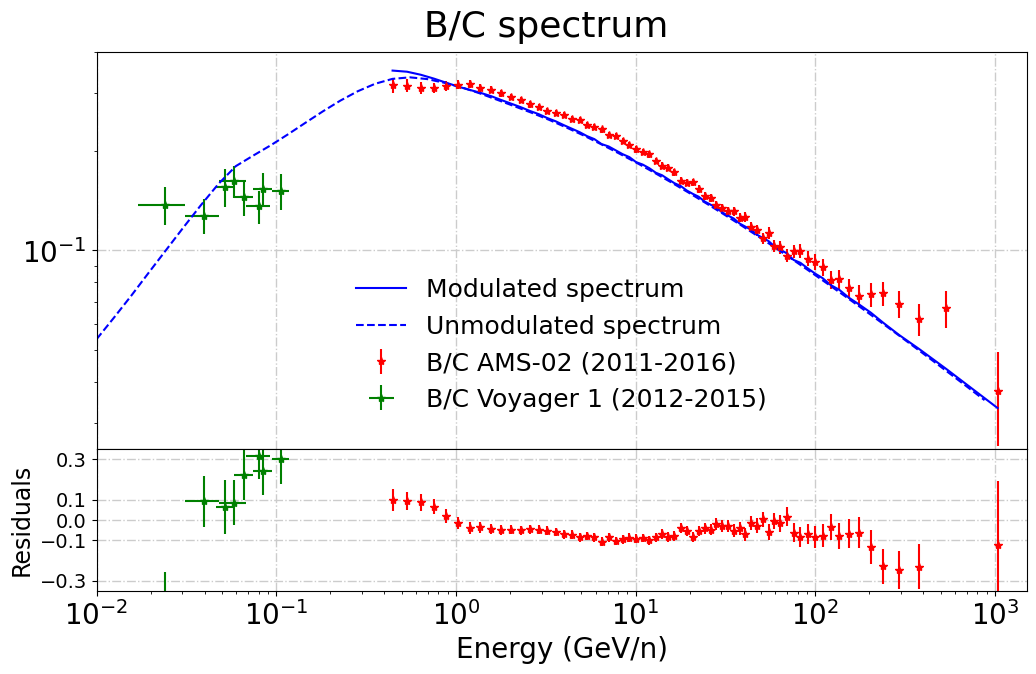

In [18]:
#B/C PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("B/C spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log')

frame1.errorbar(EmeanBC, fluxBC, yerr = [fluxBC_low, fluxBC_up], fmt='*r', label = "B/C AMS-02 (2011-2016)") #Real data

#frame1.errorbar(EmeanBCP, fluxBCP, xerr = [(EmeanBCP-EmeanBCP_low)/EmeanBCP, (EmeanBCP_up-EmeanBCP)/EmeanBCP], yerr = [fluxBCP_low, fluxBCP_up], fmt='*k', label = "B/C Pamela (2006-2008)")

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr= [Emean_min, Emean_max], yerr=fluxerr, fmt= '*g', label = "B/C Voyager 1 (2012-2015)") #Real data

B10 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_B10)[0], 5, 10, phi_ams))
B11 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_B11)[0], 5, 11, phi_ams))

C12 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C12)[0], 6, 12, phi_ams))
C13 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C13)[0], 6, 13, phi_ams))
C14 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C14)[0], 6, 14, phi_ams))

mod0 = (B10 + B11)/(C12 + C13 + C14)
frame1.plot(EmeanBC, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_B10) + np.array(table_B11))[0]/(np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxBC)
frame2.errorbar(EmeanBC, diff/mod0, yerr = errfluxBC/fluxBC,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

frame1.set_ylim(bottom = 2.5e-2)
frame2.set_ylim(top = 0.35, bottom = -0.35)
frame2.set_xlim(right = 1.5e3, left = 0.01)
frame2.set_yticks([-0.3, -0.1, 0, 0.1, 0.3])

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.show()
plt.close()

# Plot of CR density as a function of the galactic radius (R) in the galactic plane (z=0)

In [19]:
def read_fits_pHelep(inpfile):

    print(inpfile)
    hdulist = fits.open(inpfile)
    prihdr = hdulist[0].header  # the primary header

    n_ext  = len(hdulist)
   
    table_header = hdulist[0].header     # header attribute of TABLE 
    
    zmin   = table_header['zmin']
    zmax   = table_header['zmax']
    rmin   = table_header['rmin']
    rmax   = table_header['rmax']
    izsun  = table_header['izsun']
    irsun  = table_header['irsun']
    dimz   = table_header['dimz']
    dimr   = table_header['dimr']
    robs   = table_header['robs']
    zobs   = table_header['zobs']
    
    rvec = np.linspace(rmin, rmax, dimr)
    zvec = np.linspace(zmin, zmax, dimz)

    emin   = table_header['ekmin']
    ek_fac = table_header['ekin_fac']
    dimE   = table_header['dimE']

    E = [emin*(ek_fac**i) for i in range(0,dimE)]
    E = np.array(E)
    print(rvec[irsun], zvec[izsun], irsun, izsun, dimE, emin, max(E))


    table_H1_P, table_H1_S, table_H2, table_H3 = [], [], [], []
    table_He3, table_He4 = [], []
    for i in range(1,n_ext): #points in the list         
    
        if hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 0 :
            table_H1_P.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 1 :
            table_H1_S.append(hdulist[i].data)
            
        elif hdulist[i].header['A'] == 2 and hdulist[i].header['Z_'] == 1 :
            table_H2.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 1 :
            table_H3.append(hdulist[i].data)
            
        elif hdulist[i].header['A'] == 4 and hdulist[i].header['Z_'] == 2 :
            table_He4.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 2 :
            table_He3.append(hdulist[i].data)
   

    table_H1 = (np.array(table_H1_P) + np.array(table_H1_S) + np.array(table_H2) + np.array(table_H3))[0]
    table_He = (np.array(table_He3) + np.array(table_He4))[0]

    return E, izsun, irsun, rvec, zvec, table_H1, table_He

In [20]:
Myinpfile = "BaseModel_DRAGONxsec.fits.gz"
E,  izsun, irsun, rvec, zvec, table_H1, table_He = read_fits_pHelep(Myinpfile)

BaseModel_DRAGONxsec.fits.gz
8.200000000000001 0.0 41 40 74 0.01 118694.59682199749


In [21]:
data = data_folder +  'prot_AMS_2011-2013.dat'
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxp = (fluxp_low + fluxp_up)/2

data = data_folder + 'p_flux_ATIC2009.txt'
EmeanAT, EmeanAT_low, EmeanAT_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxAT, fluxAT_low, fluxAT_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxAT = (fluxAT_low + fluxAT_up)/2

data = data_folder + 'p_flux_CREAMIII_ApJ2017.txt'
EmeanCR, EmeanCR_low, EmeanCR_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxCR, fluxCR_low, fluxCR_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxCR = (fluxCR_low + fluxCR_up)/2

data = data_folder + 'DAMPE_protons.txt'
EmeanDA, EmeanDA_low, EmeanDA_up = np.loadtxt(data,skiprows=1,usecols=(1, 0, 2), unpack=True)
fluxDA, fluxDA_low, fluxDA_up = np.loadtxt(data,skiprows=1,usecols=(4, 3, 5), unpack=True)
errfluxDA = (fluxDA_low + fluxDA_up)/2

data = data_folder + 'p_CALET_PRL2019.txt'
EmeanCA, EmeanCA_low, EmeanCA_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxCA, fluxCA_low, fluxCA_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxCA = (fluxCA_low + fluxCA_up)/2

data = data_folder + 'Protons_NUCLEON.txt'
EmeanNu, fluxNu, stat, sys = np.loadtxt(data, skiprows=0,usecols=(0, 1, 2, 3), unpack=True)
errfluxNu = (sys**2 + stat**2)

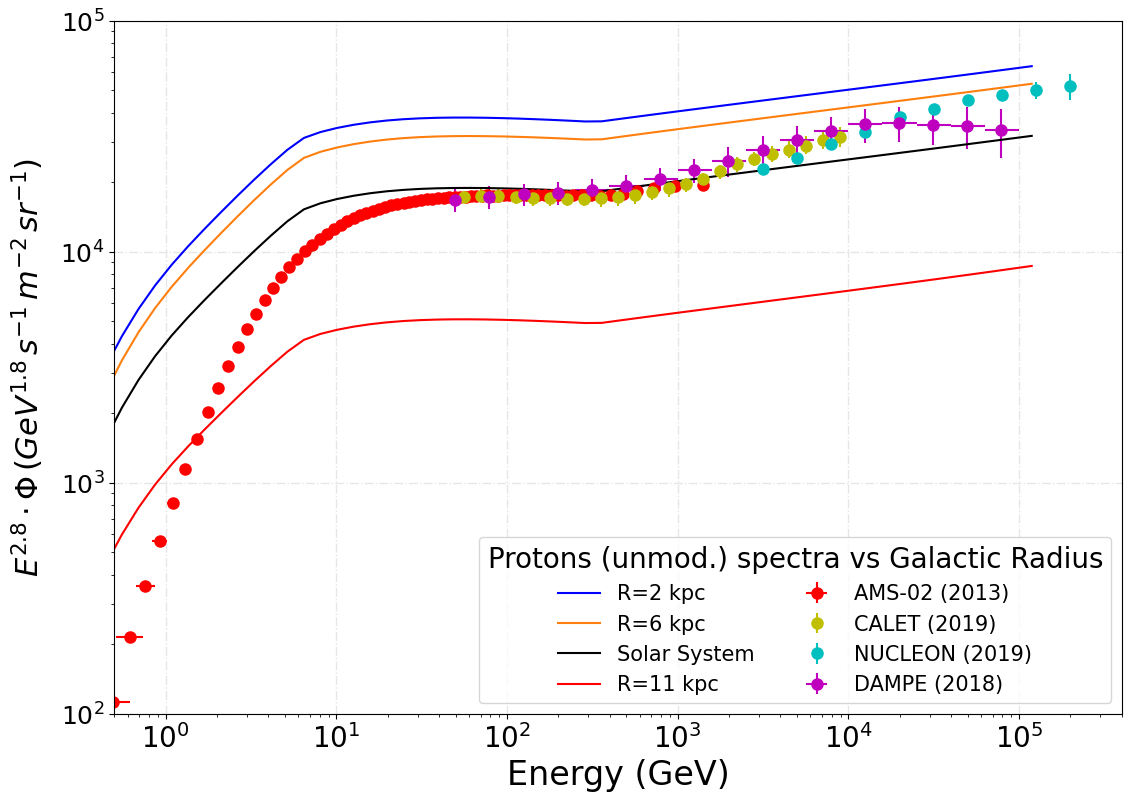

In [22]:
fig1, ax = plt.subplots( figsize=(13,9), edgecolor='blue', facecolor = 'w')

plt.yscale('log')
plt.xscale('log')

slope = 2.8
plt.errorbar(Emeanp, fluxp*np.power(Emeanp, slope), xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low*np.power(Emeanp, slope), fluxp_up*np.power(Emeanp, slope)], ms = 8, fmt= 'ro', label = r"AMS-02 (2013)") 

plt.errorbar(EmeanCA, fluxCA*np.power(EmeanCA, slope-2.8), yerr = [(fluxCA_low)*np.power(EmeanCA, slope-2.8), (fluxCA_up)*np.power(EmeanCA, slope-2.8)], ms = 8, fmt= 'yo', label = r"CALET (2019)")

plt.errorbar(EmeanNu, fluxNu*np.power(EmeanNu, slope), yerr = (errfluxNu/fluxNu)*np.power(EmeanNu, slope), ms = 8, fmt= 'co', label = r"NUCLEON (2019)") 

plt.errorbar(EmeanDA, fluxDA*np.power(EmeanDA, slope), xerr = [(EmeanDA-EmeanDA_low), (EmeanDA_up-EmeanDA)], yerr = [(-fluxDA_low+fluxDA)*np.power(EmeanDA, slope), (fluxDA_up-fluxDA)*np.power(EmeanDA, slope)], ms = 8, fmt= 'mo', label = r"DAMPE (2018)")


plt.plot(E, table_H1[izsun, (np.abs(rvec - 2)).argmin()]*np.power(E, slope), 'b-', label = "R=2 kpc")

plt.plot(E, table_H1[izsun, (np.abs(rvec - 6)).argmin()]*np.power(E, slope), 'C1-', label = "R=6 kpc")

plt.plot(E, table_H1[izsun, irsun]*np.power(E, slope), "k-", label = "Solar System") 

plt.plot(E, table_H1[izsun, (np.abs(rvec - 11)).argmin()]*np.power(E, slope), 'r-', label = "R=11 kpc")


lg = ax.legend(fontsize = 15, loc = 0, ncol = 2, title = 'Protons (unmod.) spectra vs Galactic Radius')
lg.get_title().set_fontsize(20)

ax.set_ylabel(r"$E^{2.8} \cdot \Phi \, (GeV^{1.8} \, s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
ax.set_xlabel("Energy (GeV)", fontsize = 24)
ax.set_xlim(left = 0.5, right = 4e5)
ax.set_ylim(bottom = 1e2, top = 1e5) 
ax.grid(color = '0.9', linestyle='-.', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

plt.show()
plt.close()

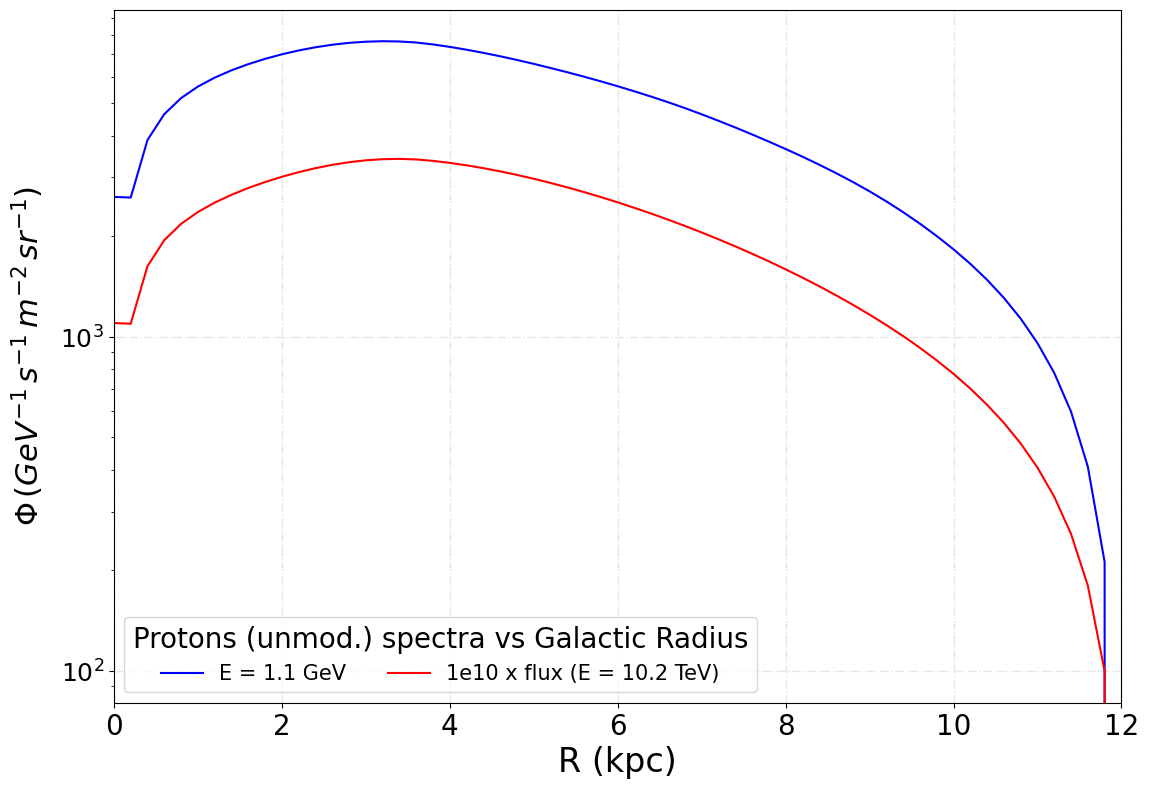

In [23]:
    #####################################      H vs R plot       #######################################################
    
fig1, ax = plt.subplots( figsize=(13,9), edgecolor='blue', facecolor = 'w')

plt.yscale('log')

slope = 2.8


plt.plot(rvec, table_H1[izsun, :,21], 'b-', label = f"E = {np.round(E[21],1)} GeV")
plt.plot(rvec, 1e10*table_H1[izsun, :,62], 'r-', label = f"1e10 x flux (E = {np.round(E[62]/1000,1)} TeV)")

lg = ax.legend(fontsize = 15, loc = 0, ncol = 2, title = 'Protons (unmod.) spectra vs Galactic Radius')
lg.get_title().set_fontsize(20)

ax.set_ylabel(r"$\Phi \, (GeV^{-1} \, s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
ax.set_xlabel("R (kpc)", fontsize = 24)
ax.set_xlim(left = 0, right = 12)
ax.grid(color = '0.9', linestyle='-.', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

plt.show()
plt.close()

## 3D EXTRA COMPONENT: SPIRAL ARMS

In [24]:
out_folder = './'
FILE = out_folder + '3D_run.fits.gz'
print(FILE)
hdulist = fits.open(FILE)
hdulist.info()
len(hdulist), type(hdulist)

./3D_run.fits.gz
Filename: ./3D_run.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   (100, 121, 121, 21)   float32   
  1                1 ImageHDU        16   (100, 121, 121, 21)   float32   


(2, astropy.io.fits.hdu.hdulist.HDUList)

In [25]:
hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  100 / length of data axis 1                          
NAXIS2  =                  121 / length of data axis 2                          
NAXIS3  =                  121 / length of data axis 3                          
NAXIS4  =                   21 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
RMIN    =                   0.                                                  
RMAX    =                  12.                                                  
XMIN    =                 -1

In [26]:
def read_fits_plep(inpfile):

    print(inpfile)
    hdulist = fits.open(inpfile)
    prihdr = hdulist[0].header  # the primary header
    n_ext  = len(hdulist)
   
    table_header = hdulist[0].header     # header attribute of TABLE 
    
    zmin   = table_header['zmin']
    zmax   = table_header['zmax']
    xmin   = table_header['xmin']
    xmax   = table_header['xmax']
    ymin   = table_header['ymin']
    ymax   = table_header['ymax']
    izsun  = table_header['izsun']
    ixsun  = table_header['ixsun']
    iysun  = table_header['iysun']
    dimz   = table_header['dimz']
    dimx   = table_header['dimx']
    dimy   = table_header['dimy']
    
    xvec = np.linspace(xmin, xmax, dimx)
    yvec = np.linspace(ymin,ymax,dimy)
    zvec = np.linspace(zmin, zmax, dimz)

    emin   = table_header['ekmin']
    ek_fac = table_header['ekin_fac']
    dimE   = table_header['dimE']

    E = [emin*(ek_fac**i) for i in range(0,dimE)]
    E = np.array(E)
    print(xvec[ixsun], yvec[iysun],zvec[izsun], ixsun, izsun, izsun, dimE, emin, max(E))

    
    table_extra = []
    for i in range(1,n_ext): #points in the list         
            
        if hdulist[i].header['A'] == 0 and hdulist[i].header['EXTRA'] == 1:
            table_extra.append(hdulist[i].data)
   

    return E, ixsun, iysun, izsun, xvec, yvec, zvec, table_extra

In [27]:
Myinpfile = "3D_run.fits.gz"
E, ixsun, iysun, izsun, xvec, yvec, zvec, table_extra = read_fits_plep(Myinpfile)

3D_run.fits.gz
8.200000000000003 0.0 0.0 101 10 10 100 0.01 10211.421310437214


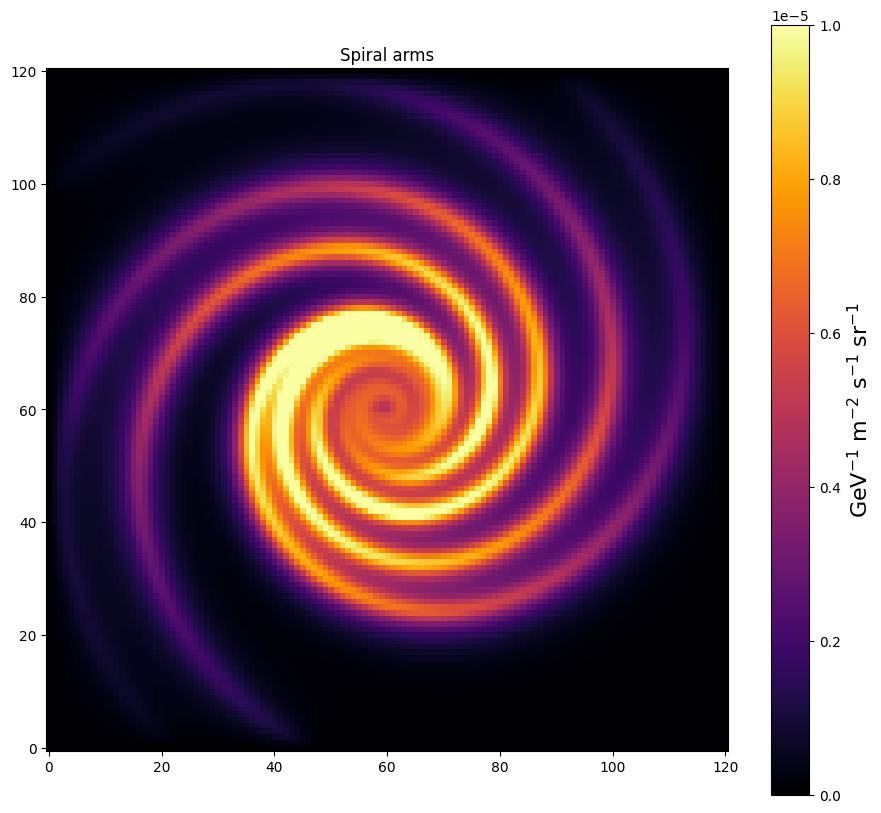

In [32]:
fig1, ax = plt.subplots(figsize=(11,10))

im = ax.imshow(table_extra[0][10,:,:,70],origin='lower',vmin=0,vmax=1e-5,cmap='inferno')
ax.set_title('Spiral arms')
cbar = fig1.colorbar(im)
cbar.ax.set_ylabel(r'GeV$^{-1}$ m$^{-2}$ s$^{-1}$ sr$^{-1}$',fontsize=16)
plt.show()